In [1]:
import os

try:
    os.chdir('/Users/cha/Desktop/공모전/SWING 2023 교육&해커톤/Project/data')
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")

Directory changed


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timedelta

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
import platform
if platform.system() == 'Darwin': 
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': 
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 교통량 데이터

In [10]:
data = pd.read_excel('06월 서울시 교통량 조사자료(2022).xlsx')

In [9]:
!pip install openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 4.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [11]:
data

,지점별 일자별 교통량 범례,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,구분,설명,표현 예시,예시 설명
1,일자,교통량 조사 일자,20181201,43435
2,요일,교통량 조사 요일\n(※ 공휴일은 '일'로 표시),토,토요일
3,지점명,교통량 조사 도로명(조사지점명),성산로(금화터널),조사지점의 도로명(지점명)
4,지점번호,"조사지점을 5개 영역(A,B,C,D,F)으로 구분하고 일련번호를 부여함\n- [A(...",A-01,도심 1번 지점
5,방향,유입 : 외곽에서 서울시청으로 들어오는 방향\n유출 : 시울시청에서 외곽으로 나가는 방향,유입/유출,NaN
6,구분,조사지점에서 가까운 교차로명으로 방향표시,봉원고가차도→독립문역,봉원고가차도에서 독립문역 방향의 교통량
7,시간대,1시간 단위를 표시,0시,0시~1시
8,교통량,1시간 교통량,809,809대/시


In [13]:
data = pd.read_csv('06월 서울시 교통량 조사자료.csv', encoding='utf-8')
data

,일자,요일,지점명,지점번호,방향,구분,0시,1시,2시,3시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,20220601,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,580.0,477.0,340.0,291.0,...,1507.0,1493.0,1460.0,1445.0,1248.0,905.0,931.0,987.0,785.0,546.0
1,20220602,목,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,401.0,247.0,241.0,158.0,...,1730.0,1813.0,1952.0,1941.0,1833.0,1399.0,1220.0,1130.0,1252.0,731.0
2,20220603,금,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,515.0,392.0,273.0,237.0,...,1914.0,1951.0,2022.0,2303.0,2120.0,1548.0,1284.0,1206.0,1130.0,877.0
3,20220604,토,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,533.0,463.0,372.0,314.0,...,1739.0,1535.0,1632.0,1677.0,1453.0,1131.0,1010.0,1083.0,947.0,685.0
4,20220605,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,445.0,368.0,292.0,218.0,...,1444.0,1379.0,1341.0,1320.0,1205.0,1041.0,931.0,979.0,770.0,617.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8335,20220626,일,신월여의지하도로,F-10,유출,서울교->신월IC,585.0,427.0,234.0,172.0,...,1512.0,1636.0,1801.0,1626.0,1409.0,1178.0,1239.0,1142.0,1012.0,577.0
8336,20220627,월,신월여의지하도로,F-10,유출,서울교->신월IC,350.0,211.0,122.0,68.0,...,1442.0,1599.0,1773.0,1932.0,1750.0,1977.0,1715.0,1227.0,1163.0,734.0
8337,20220628,화,신월여의지하도로,F-10,유출,서울교->신월IC,460.0,244.0,168.0,126.0,...,1406.0,1624.0,1927.0,1801.0,1858.0,2089.0,1570.0,1349.0,1272.0,850.0
8338,20220629,수,신월여의지하도로,F-10,유출,서울교->신월IC,524.0,309.0,218.0,155.0,...,1359.0,1543.0,1896.0,1906.0,1847.0,1922.0,1762.0,1325.0,1186.0,748.0


In [115]:
df = data.copy()

In [116]:
df = df.drop('지점번호', axis=1)

In [117]:
df = df.dropna(axis=0)
df

,일자,요일,지점명,방향,구분,0시,1시,2시,3시,4시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,20220601,일,성산로(금화터널),유입,봉원고가차도->독립문역,580.0,477.0,340.0,291.0,361.0,...,1507.0,1493.0,1460.0,1445.0,1248.0,905.0,931.0,987.0,785.0,546.0
1,20220602,목,성산로(금화터널),유입,봉원고가차도->독립문역,401.0,247.0,241.0,158.0,292.0,...,1730.0,1813.0,1952.0,1941.0,1833.0,1399.0,1220.0,1130.0,1252.0,731.0
2,20220603,금,성산로(금화터널),유입,봉원고가차도->독립문역,515.0,392.0,273.0,237.0,312.0,...,1914.0,1951.0,2022.0,2303.0,2120.0,1548.0,1284.0,1206.0,1130.0,877.0
3,20220604,토,성산로(금화터널),유입,봉원고가차도->독립문역,533.0,463.0,372.0,314.0,307.0,...,1739.0,1535.0,1632.0,1677.0,1453.0,1131.0,1010.0,1083.0,947.0,685.0
4,20220605,일,성산로(금화터널),유입,봉원고가차도->독립문역,445.0,368.0,292.0,218.0,216.0,...,1444.0,1379.0,1341.0,1320.0,1205.0,1041.0,931.0,979.0,770.0,617.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8335,20220626,일,신월여의지하도로,유출,서울교->신월IC,585.0,427.0,234.0,172.0,148.0,...,1512.0,1636.0,1801.0,1626.0,1409.0,1178.0,1239.0,1142.0,1012.0,577.0
8336,20220627,월,신월여의지하도로,유출,서울교->신월IC,350.0,211.0,122.0,68.0,118.0,...,1442.0,1599.0,1773.0,1932.0,1750.0,1977.0,1715.0,1227.0,1163.0,734.0
8337,20220628,화,신월여의지하도로,유출,서울교->신월IC,460.0,244.0,168.0,126.0,110.0,...,1406.0,1624.0,1927.0,1801.0,1858.0,2089.0,1570.0,1349.0,1272.0,850.0
8338,20220629,수,신월여의지하도로,유출,서울교->신월IC,524.0,309.0,218.0,155.0,133.0,...,1359.0,1543.0,1896.0,1906.0,1847.0,1922.0,1762.0,1325.0,1186.0,748.0


In [157]:
b = df[(df['요일']!='일') &(df['요일']!='토') ]
b

,일자,요일,지점명,방향,구분,0시,1시,2시,3시,4시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,traffic max time
1,20220602,목,성산로(금화터널),유입,봉원고가차도->독립문역,401.0,247.0,241.0,158.0,292.0,...,1813.0,1952.0,1941.0,1833.0,1399.0,1220.0,1130.0,1252.0,731.0,7시
2,20220603,금,성산로(금화터널),유입,봉원고가차도->독립문역,515.0,392.0,273.0,237.0,312.0,...,1951.0,2022.0,2303.0,2120.0,1548.0,1284.0,1206.0,1130.0,877.0,7시
6,20220607,화,성산로(금화터널),유입,봉원고가차도->독립문역,364.0,251.0,183.0,169.0,268.0,...,1991.0,1947.0,2074.0,1846.0,1415.0,1143.0,1171.0,1061.0,745.0,7시
7,20220608,수,성산로(금화터널),유입,봉원고가차도->독립문역,573.0,382.0,286.0,222.0,276.0,...,1991.0,1961.0,2094.0,1937.0,1381.0,1172.0,1197.0,1082.0,792.0,7시
8,20220609,목,성산로(금화터널),유입,봉원고가차도->독립문역,555.0,409.0,304.0,237.0,352.0,...,1955.0,1948.0,1810.0,2011.0,1375.0,1129.0,1132.0,1022.0,789.0,7시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8333,20220624,금,신월여의지하도로,유출,서울교->신월IC,483.0,388.0,220.0,151.0,136.0,...,1811.0,2014.0,1705.0,1687.0,1802.0,1509.0,1401.0,1467.0,1151.0,NaN
8336,20220627,월,신월여의지하도로,유출,서울교->신월IC,350.0,211.0,122.0,68.0,118.0,...,1599.0,1773.0,1932.0,1750.0,1977.0,1715.0,1227.0,1163.0,734.0,NaN
8337,20220628,화,신월여의지하도로,유출,서울교->신월IC,460.0,244.0,168.0,126.0,110.0,...,1624.0,1927.0,1801.0,1858.0,2089.0,1570.0,1349.0,1272.0,850.0,NaN
8338,20220629,수,신월여의지하도로,유출,서울교->신월IC,524.0,309.0,218.0,155.0,133.0,...,1543.0,1896.0,1906.0,1847.0,1922.0,1762.0,1325.0,1186.0,748.0,NaN


In [158]:
b['traffic max time'] = np.NaN

In [159]:
for i in range(len(b)):
    b['traffic max time'][i]= b.iloc[i][b.iloc[i] == b.iloc[i][5:].max()].index[0]

In [160]:
b['traffic max time'].value_counts()

8시     657
7시     615
18시    532
17시    392
6시     215
16시    104
9시      86
19시     68
15시     58
21시     33
14시     28
13시     21
11시     21
10시     20
20시     16
12시     13
5시      13
22시     11
23시      3
Name: traffic max time, dtype: int64

In [161]:
time = df.columns[5:-1]
string = '시'
time = [s.replace(string, '') for s in time]
time= list(map(int, time))

In [172]:
a = pd.DataFrame(data=[0,0,0,0,0,13,215,615,657,86,20,21,13,21,28,58,104,392,532,68,16,33,11,3], index=time, columns=['Traffic Max Time'])
a

,Traffic Max Time
0,0
1,0
2,0
3,0
4,0
5,13
6,215
7,615
8,657
9,86


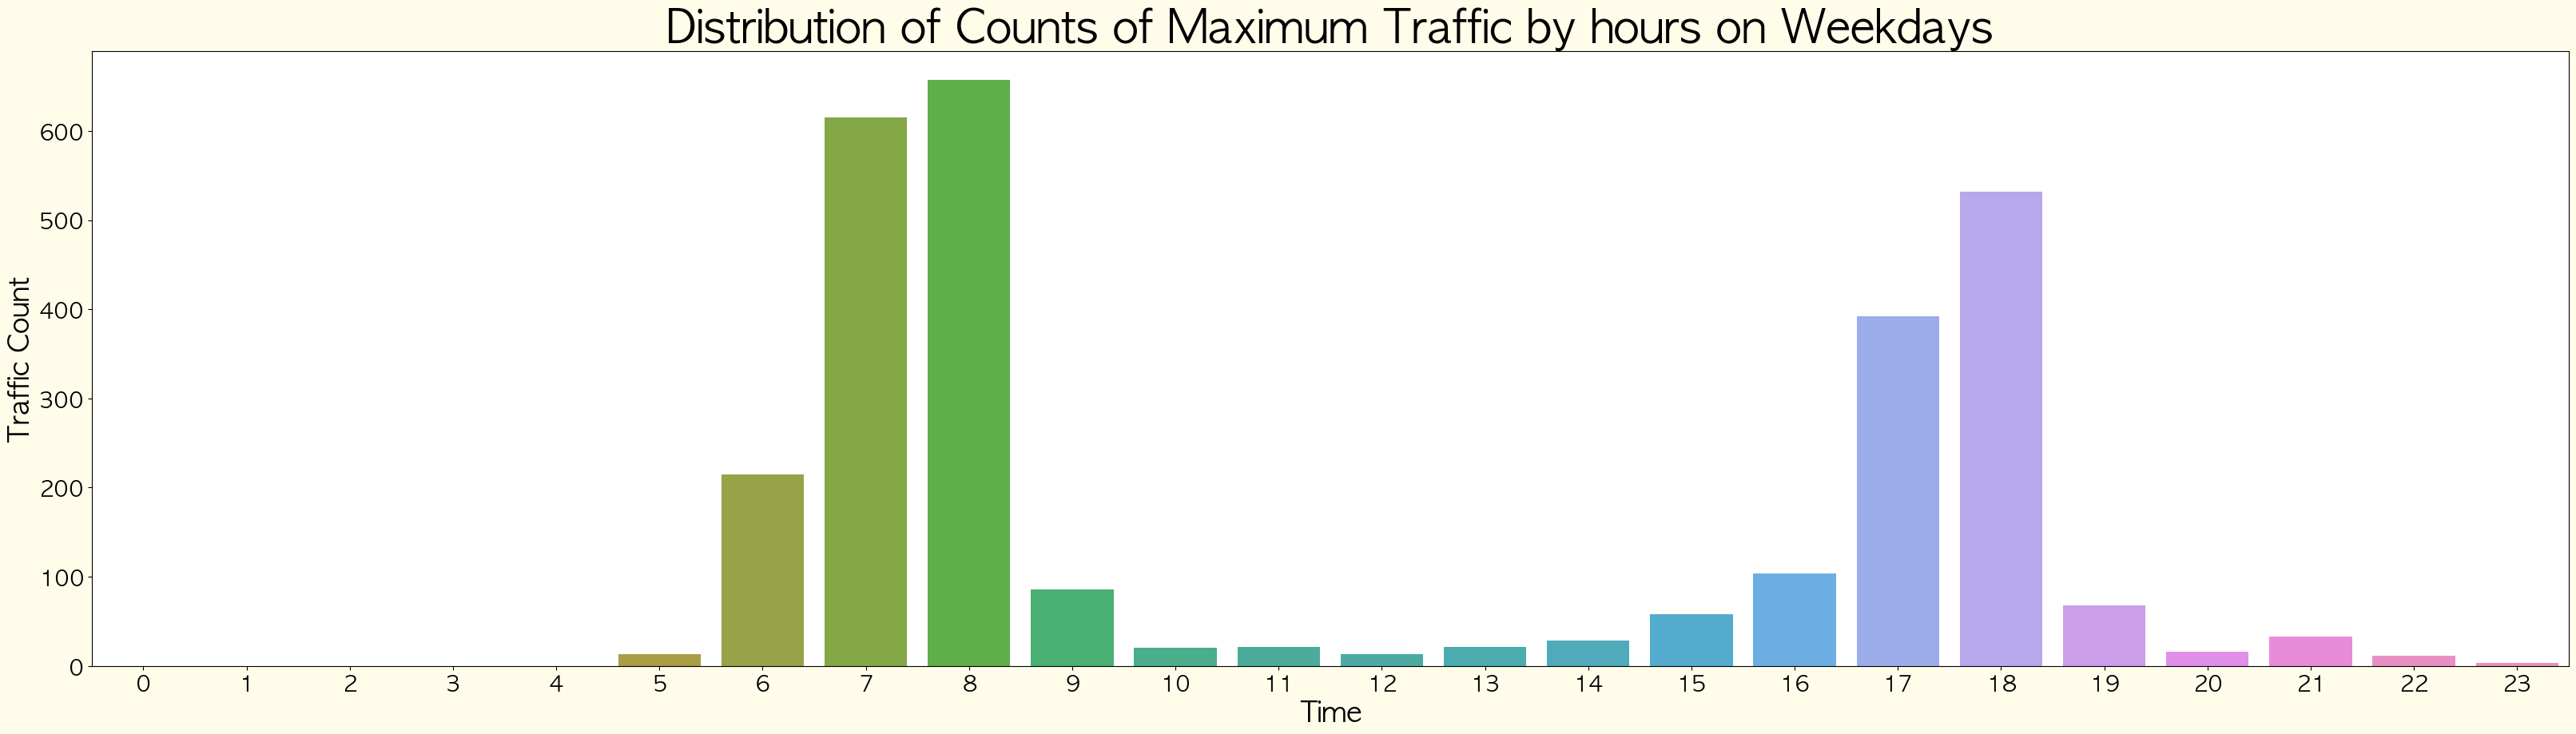

In [173]:
fig, ax1 = plt.subplots(figsize=(40, 10), facecolor='#FFFCEA')

sns.barplot(x=a.index, y=a['Traffic Max Time']) # 색깔 잘 되려면..

# 그래프 제목과 축 레이블 설정
plt.xlabel('Time', fontdict={'fontsize':25})
plt.ylabel('Traffic Count', fontdict={'fontsize':25})

#plt.xticks(a.index[::1], a.index[::1], fontsize=20)
plt.yticks(fontsize=20)
plt.title('Distribution of Counts of Maximum Traffic by hours on Weekdays', fontdict = {'fontsize' : 40, 'fontweight': 'bold'})
plt.rcParams['font.size'] = 20

plt.show()

## 평일 교통량 더하기

In [129]:
b = df[(df['요일']!='일') &(df['요일']!='토') ]
b

,일자,요일,지점명,방향,구분,0시,1시,2시,3시,4시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,traffic max time
1,20220602,목,성산로(금화터널),유입,봉원고가차도->독립문역,401.0,247.0,241.0,158.0,292.0,...,1813.0,1952.0,1941.0,1833.0,1399.0,1220.0,1130.0,1252.0,731.0,7시
2,20220603,금,성산로(금화터널),유입,봉원고가차도->독립문역,515.0,392.0,273.0,237.0,312.0,...,1951.0,2022.0,2303.0,2120.0,1548.0,1284.0,1206.0,1130.0,877.0,7시
6,20220607,화,성산로(금화터널),유입,봉원고가차도->독립문역,364.0,251.0,183.0,169.0,268.0,...,1991.0,1947.0,2074.0,1846.0,1415.0,1143.0,1171.0,1061.0,745.0,7시
7,20220608,수,성산로(금화터널),유입,봉원고가차도->독립문역,573.0,382.0,286.0,222.0,276.0,...,1991.0,1961.0,2094.0,1937.0,1381.0,1172.0,1197.0,1082.0,792.0,7시
8,20220609,목,성산로(금화터널),유입,봉원고가차도->독립문역,555.0,409.0,304.0,237.0,352.0,...,1955.0,1948.0,1810.0,2011.0,1375.0,1129.0,1132.0,1022.0,789.0,7시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8333,20220624,금,신월여의지하도로,유출,서울교->신월IC,483.0,388.0,220.0,151.0,136.0,...,1811.0,2014.0,1705.0,1687.0,1802.0,1509.0,1401.0,1467.0,1151.0,NaN
8336,20220627,월,신월여의지하도로,유출,서울교->신월IC,350.0,211.0,122.0,68.0,118.0,...,1599.0,1773.0,1932.0,1750.0,1977.0,1715.0,1227.0,1163.0,734.0,NaN
8337,20220628,화,신월여의지하도로,유출,서울교->신월IC,460.0,244.0,168.0,126.0,110.0,...,1624.0,1927.0,1801.0,1858.0,2089.0,1570.0,1349.0,1272.0,850.0,NaN
8338,20220629,수,신월여의지하도로,유출,서울교->신월IC,524.0,309.0,218.0,155.0,133.0,...,1543.0,1896.0,1906.0,1847.0,1922.0,1762.0,1325.0,1186.0,748.0,NaN


In [130]:
b['0시'].sum()

3481006.0

In [135]:
traffic = []
for i in range(5,29):
    traffic.append(b[b.columns[i]].sum())

In [147]:
time = df.columns[5:-1]
string = '시'
time = [s.replace(string, '') for s in time]
time= list(map(int, time))

In [188]:
a = pd.DataFrame(data=traffic, index=time, columns=['Traffic Max Time'])
a

,Traffic Max Time
0,3481006.0
1,2522611.0
2,1939512.0
3,1688812.0
4,2323937.0
5,5201311.0
6,8587316.0
7,10589984.0
8,10696807.0
9,10091700.0


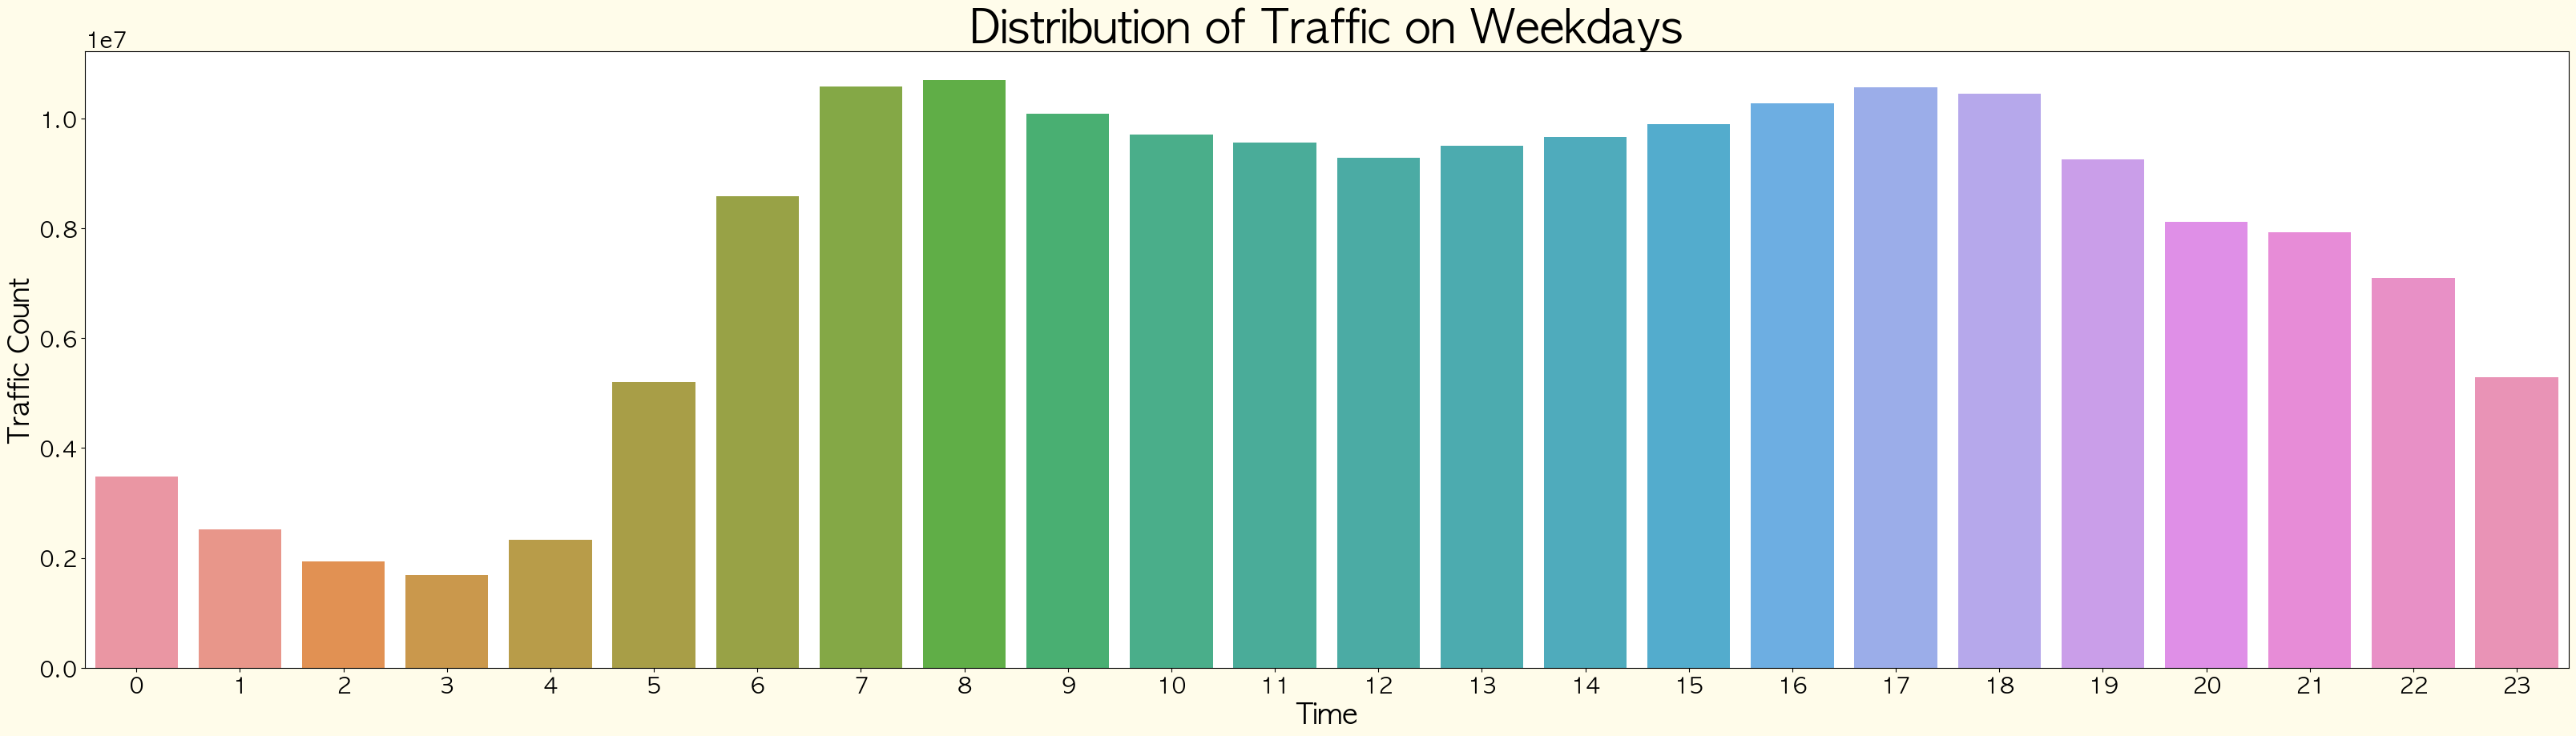

In [154]:
fig, ax1 = plt.subplots(figsize=(40, 10), facecolor='#FFFCEA')

sns.barplot(x=a.index, y=a['Traffic Max Time']) # 색깔 잘 되려면..

# 그래프 제목과 축 레이블 설정
plt.xlabel('Time', fontdict={'fontsize':25})
plt.ylabel('Traffic Count', fontdict={'fontsize':25})

#plt.xticks(a.index[::1], a.index[::1], fontsize=20)
plt.yticks(fontsize=20)
plt.title('Distribution of Traffic on Weekdays', fontdict = {'fontsize' : 40, 'fontweight': 'bold'})
plt.rcParams['font.size'] = 20

plt.show()

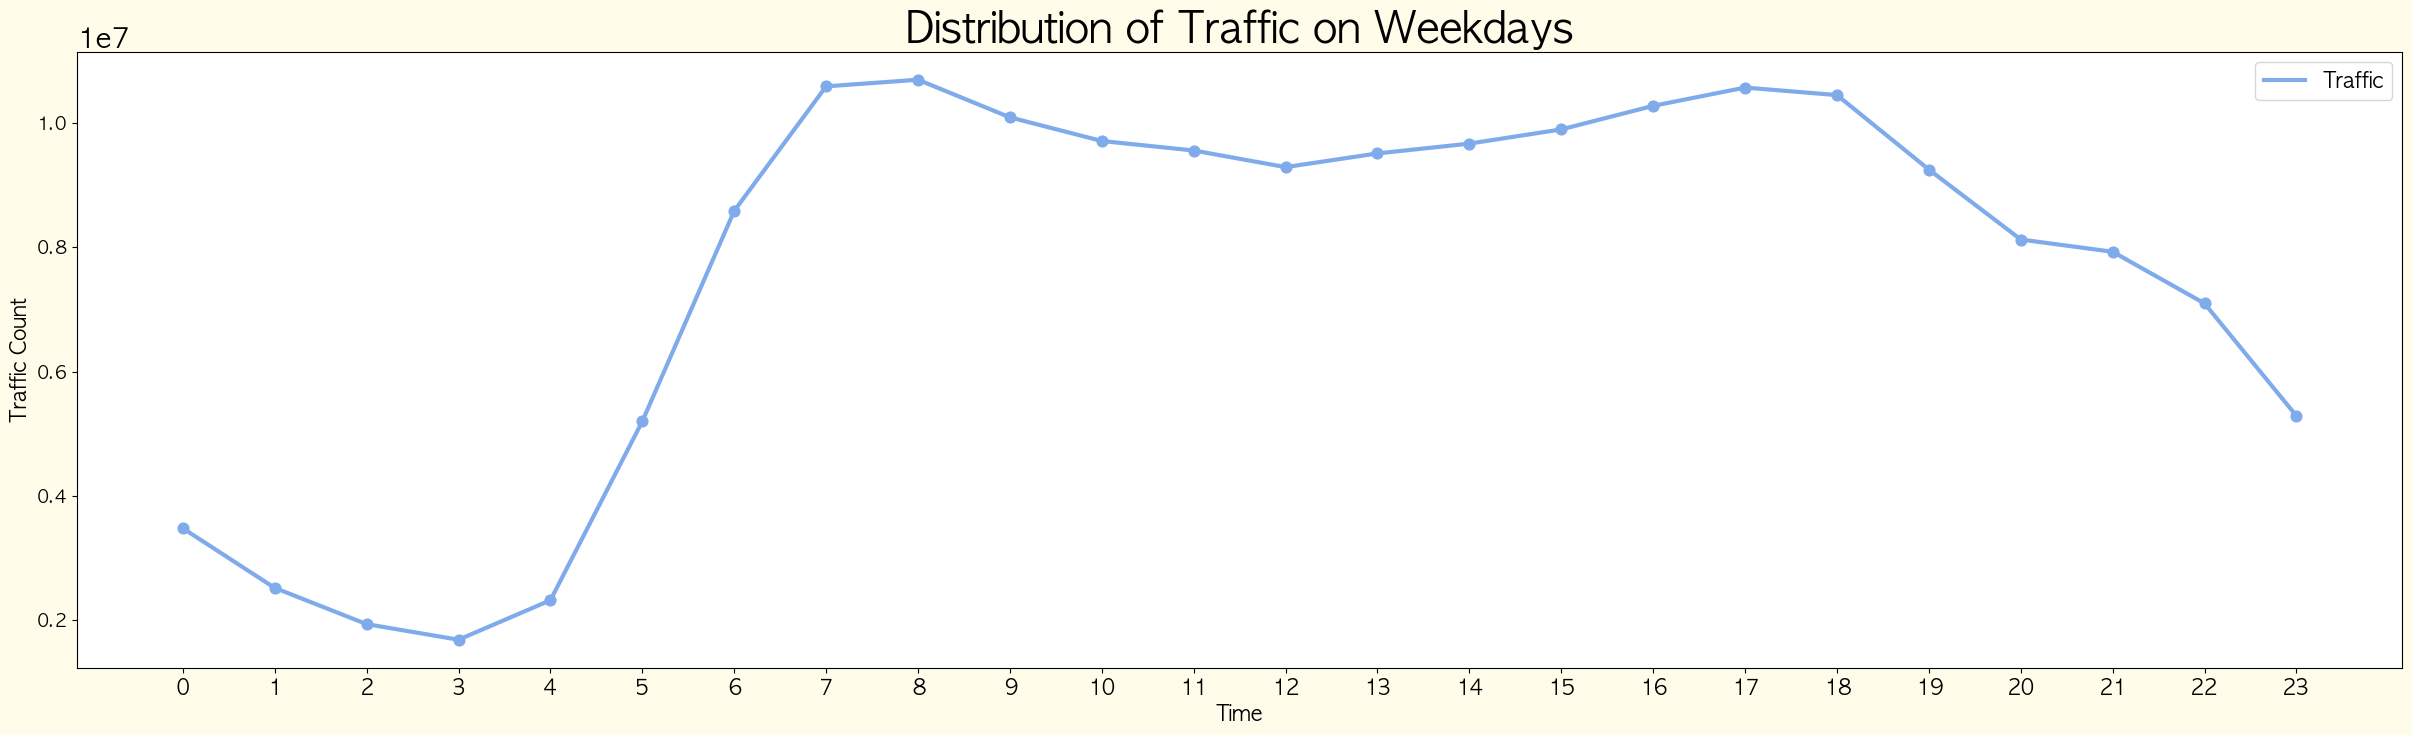

In [189]:
# graph
fig, ax1 = plt.subplots(figsize=(30, 8), facecolor='#FFFCEA')

line1 = ax1.plot(a.index, a['Traffic Max Time'],  label='Traffic', color='#80ABEB', linewidth=3)
ax1.scatter(a.index, a['Traffic Max Time'], label='Traffic', color='#80ABEB', s=60)

#     ax1.set_ylim([0, 0.06])
#     ax2.set_ylim([0.25, 0.58])

lines = line1
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 15, loc='upper right')
ax1.set_ylabel('Traffic Count', fontdict={'fontsize':15})
ax1.set_xlabel('Time', fontdict={'fontsize':15})

ax1.tick_params(axis='y', labelsize=13)
plt.xticks(a.index[::1], a.index[::1], fontsize=15)
plt.yticks(fontsize=13)
plt.title('Distribution of Traffic on Weekdays' , fontdict = {'fontsize' : 30})
#     plt.axvline(x=8, color='0.5', linestyle='--', linewidth=2)
#     plt.axvline(x=18, color='0.5', linestyle='--', linewidth=2)
#     plt.show()

print()

In [239]:
a = pd.DataFrame(data=[0,0,0,0,0,13,215,615,657,86,20,21,13,21,28,58,104,392,532,68,16,33,11,3], index=time, columns=['Traffic Max Time'])
a

,Traffic Max Time
0,0
1,0
2,0
3,0
4,0
5,13
6,215
7,615
8,657
9,86


In [240]:
traffic = []
for i in range(5,29):
    traffic.append(b[b.columns[i]].sum())

In [241]:
time = df.columns[5:-1]
string = '시'
time = [s.replace(string, '') for s in time]
time= list(map(int, time))

In [242]:
c = pd.DataFrame(data=traffic, index=time, columns=['Traffic Max Time'])
c

,Traffic Max Time
0,3481006.0
1,2522611.0
2,1939512.0
3,1688812.0
4,2323937.0
5,5201311.0
6,8587316.0
7,10589984.0
8,10696807.0
9,10091700.0


In [ ]:
fig, ax1 = plt.subplots(figsize=(40, 10), facecolor='#FFFCEA')

sns.barplot(x=a.index, y=a['Traffic Max Time']) # 색깔 잘 되려면..

# 그래프 제목과 축 레이블 설정
plt.xlabel('Time', fontdict={'fontsize':25})
plt.ylabel('Traffic Count', fontdict={'fontsize':25})

#plt.xticks(a.index[::1], a.index[::1], fontsize=20)
plt.yticks(fontsize=20)
plt.title('Distribution of Counts of Maximum Traffic by hours on Weekdays', fontdict = {'fontsize' : 40, 'fontweight': 'bold'})
plt.rcParams['font.size'] = 20

plt.show()

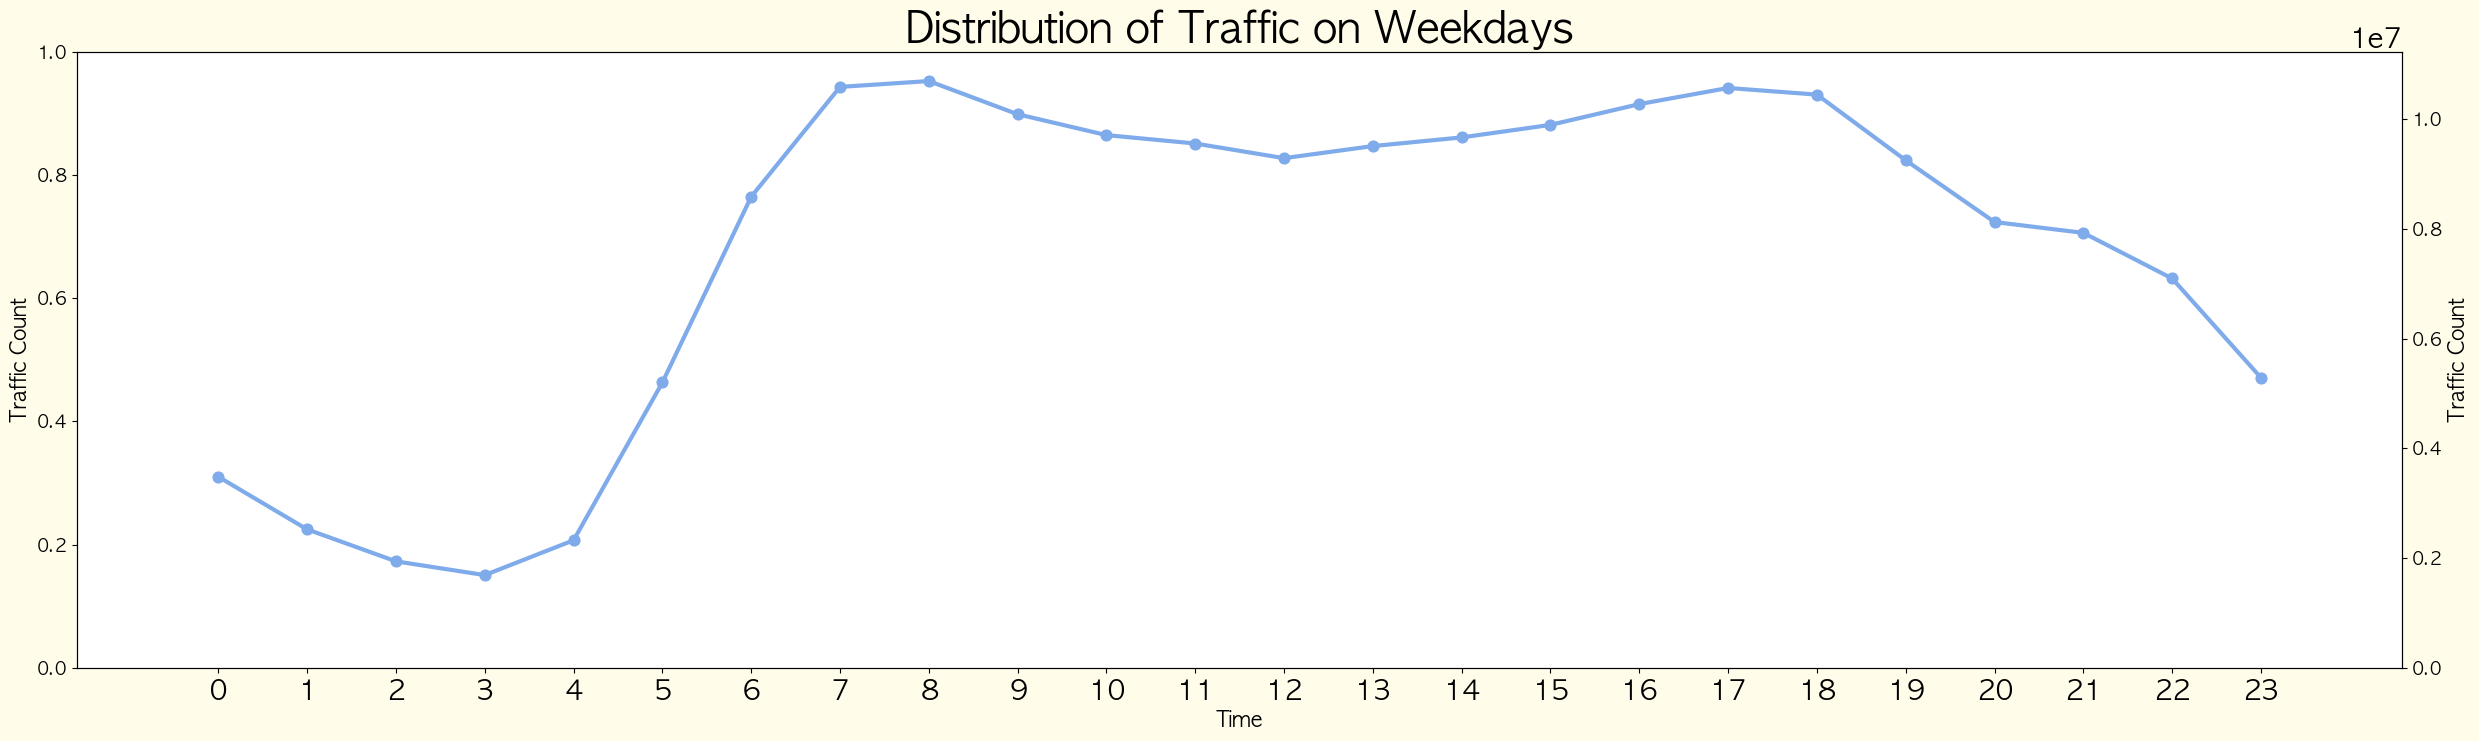

In [244]:
# graph
fig, ax1 = plt.subplots(figsize=(30, 8), facecolor='#FFFCEA')
ax2 = ax1.twinx()
sns.barplot(x=a.index, y=a['Traffic Max Time'])
line1 = ax2.plot(c.index, c['Traffic Max Time'],  label='Traffic', color='#80ABEB', linewidth=3)
ax2.scatter(c.index, c['Traffic Max Time'], label='Traffic', color='#80ABEB', s=60)

#     ax1.set_ylim([0, 0.06])
#     ax2.set_ylim([0.25, 0.58])

# lines = line1
# # labels = [l.get_label() for l in lines]
# ax1.legend(lines, labels, fontsize = 15, loc='upper right')
ax1.set_ylabel('Traffic Count', fontdict={'fontsize':15})
ax2.set_ylabel('Traffic Count', fontdict={'fontsize':15})
ax1.set_xlabel('Time', fontdict={'fontsize':15})

ax1.tick_params(axis='y', labelsize=13)
plt.xticks(a.index[::1], a.index[::1], fontsize=15)
plt.yticks(fontsize=13)
plt.title('Distribution of Traffic on Weekdays' , fontdict = {'fontsize' : 30})
#     plt.axvline(x=8, color='0.5', linestyle='--', linewidth=2)
#     plt.axvline(x=18, color='0.5', linestyle='--', linewidth=2)
#     plt.show()

print()

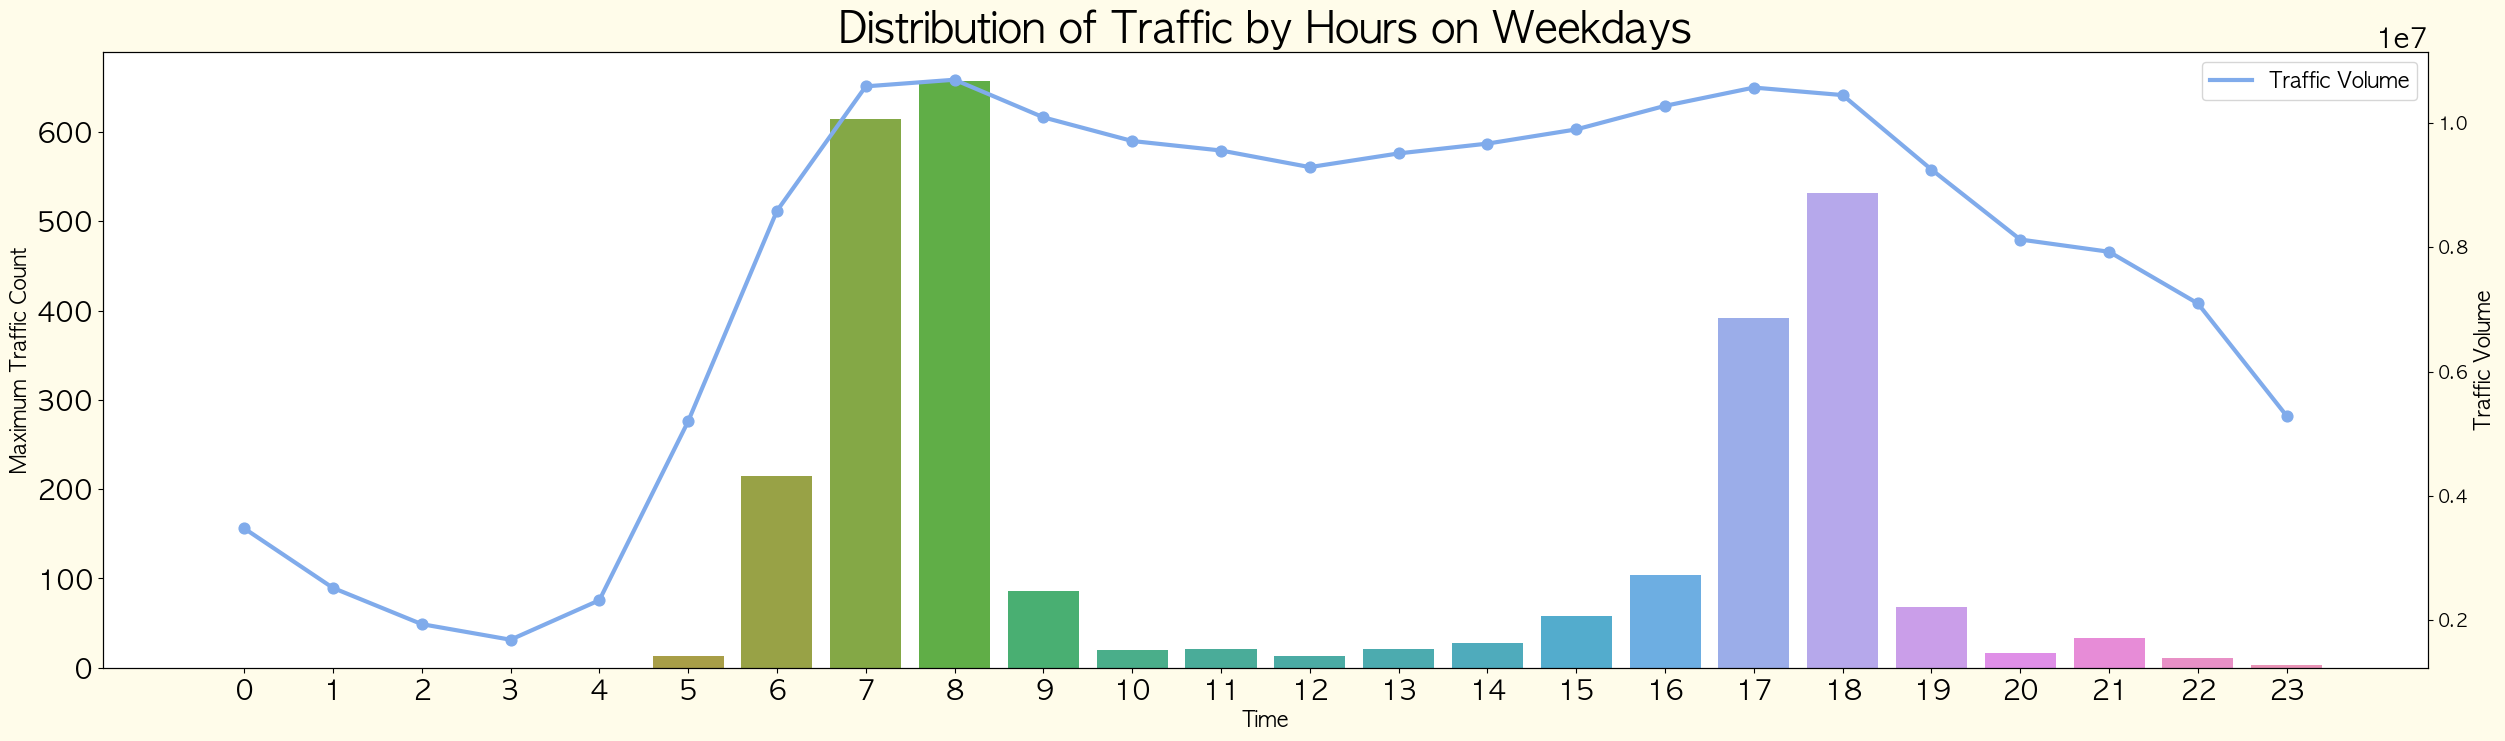

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기와 배경색 설정
fig, ax1 = plt.subplots(figsize=(30, 8), facecolor='#FFFCEA')
ax2 = ax1.twinx()

# 막대 차트 그리기
sns.barplot(x=a.index, y=a['Traffic Max Time'], ax=ax1, label='Maximum Traffic Count')

# 선 그래프 그리기
line1 = ax2.plot(c.index, c['Traffic Max Time'], label='Traffic Volume', color='#80ABEB', linewidth=3)
ax2.scatter(c.index, c['Traffic Max Time'], label='Traffic Volume', color='#80ABEB', s=60)

# 레이블과 제목 설정
ax1.set_ylabel('Maximum Traffic Count', fontdict={'fontsize': 15})
ax2.set_ylabel('Traffic Volume', fontdict={'fontsize': 15})
ax1.set_xlabel('Time', fontdict={'fontsize': 15})
plt.xticks(a.index[::1], a.index[::1], fontsize=15)
plt.yticks(fontsize=13)
plt.title('Distribution of Traffic by Hours on Weekdays', fontdict={'fontsize': 30})

# 축 범위 설정 (필요한 경우 주석 해제)
# ax1.set_ylim([0, 0.06])
# ax2.set_ylim([0.25, 0.58])

# ax1.text(0.5, 0.95, 'Maximum Traffic Count', transform=ax1.transAxes, color='black', ha='right', fontsize=15)


# 범례 설정
lines = line1
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize=15, loc='upper right')

# 수직 선 추가 (필요한 경우 주석 해제)
# plt.axvline(x=8, color='0.5', linestyle='--', linewidth=2)
# plt.axvline(x=18, color='0.5', linestyle='--', linewidth=2)

# 그래프 출력
plt.show()


In [ ]:
colors = ['#F89773', '#FFD169', '#B1CBAF', '#80ABEB', '#E49EED', '#CC99FF', '#FFFF99', '#99FFFF']

In [ ]:
color = [ '#F89773', '#FFD169', '#B1CBAF', '#80ABEB', '#E49EED']

# 유입, 유출

In [153]:
b

,일자,요일,지점명,방향,구분,0시,1시,2시,3시,4시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,traffic max time
1,20220602,목,성산로(금화터널),유입,봉원고가차도->독립문역,401.0,247.0,241.0,158.0,292.0,...,1813.0,1952.0,1941.0,1833.0,1399.0,1220.0,1130.0,1252.0,731.0,7시
2,20220603,금,성산로(금화터널),유입,봉원고가차도->독립문역,515.0,392.0,273.0,237.0,312.0,...,1951.0,2022.0,2303.0,2120.0,1548.0,1284.0,1206.0,1130.0,877.0,7시
6,20220607,화,성산로(금화터널),유입,봉원고가차도->독립문역,364.0,251.0,183.0,169.0,268.0,...,1991.0,1947.0,2074.0,1846.0,1415.0,1143.0,1171.0,1061.0,745.0,7시
7,20220608,수,성산로(금화터널),유입,봉원고가차도->독립문역,573.0,382.0,286.0,222.0,276.0,...,1991.0,1961.0,2094.0,1937.0,1381.0,1172.0,1197.0,1082.0,792.0,7시
8,20220609,목,성산로(금화터널),유입,봉원고가차도->독립문역,555.0,409.0,304.0,237.0,352.0,...,1955.0,1948.0,1810.0,2011.0,1375.0,1129.0,1132.0,1022.0,789.0,7시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8333,20220624,금,신월여의지하도로,유출,서울교->신월IC,483.0,388.0,220.0,151.0,136.0,...,1811.0,2014.0,1705.0,1687.0,1802.0,1509.0,1401.0,1467.0,1151.0,NaN
8336,20220627,월,신월여의지하도로,유출,서울교->신월IC,350.0,211.0,122.0,68.0,118.0,...,1599.0,1773.0,1932.0,1750.0,1977.0,1715.0,1227.0,1163.0,734.0,NaN
8337,20220628,화,신월여의지하도로,유출,서울교->신월IC,460.0,244.0,168.0,126.0,110.0,...,1624.0,1927.0,1801.0,1858.0,2089.0,1570.0,1349.0,1272.0,850.0,NaN
8338,20220629,수,신월여의지하도로,유출,서울교->신월IC,524.0,309.0,218.0,155.0,133.0,...,1543.0,1896.0,1906.0,1847.0,1922.0,1762.0,1325.0,1186.0,748.0,NaN


In [ ]:
def PM(a):

    # graph
    fig, ax1 = plt.subplots(figsize=(20, 8))
    ax2 = ax1.twinx()

    line1 = ax1.plot(a['측정일시'].dt.hour, a['미세먼지(㎍/㎥)'], label='PM-10(㎍/㎥)', color='r')
    ax1.scatter(a['측정일시'].dt.hour, a['미세먼지(㎍/㎥)'], label='PM-10(㎍/㎥)', color='r')
    line2 = ax2.plot(a['측정일시'].dt.hour, a['초미세먼지(㎍/㎥)'], label='PM-2.5(㎍/㎥)', color='b')
    ax2.scatter(a['측정일시'].dt.hour, a['초미세먼지(㎍/㎥)'], label='PM-2.5(㎍/㎥)', color='b')

#     ax1.set_ylim([0, 0.06])
#     ax2.set_ylim([0.25, 0.58])

    lines = line1+ line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, fontsize = 15, loc='upper right')
    ax1.set_ylabel('PM-10 Level(㎍/㎥)', fontdict={'fontsize':15})
    ax2.set_ylabel('PM-2.5 Level(㎍/㎥)', fontdict={'fontsize':15})
    ax1.set_xlabel('Time', fontdict={'fontsize':15})

    ax1.tick_params(axis='y', labelsize=13)
    ax2.tick_params(axis='y', labelsize=13)
    plt.xticks(a['측정일시'].dt.hour[::1], a['측정일시'].dt.hour[::1], fontsize=15)
    plt.yticks(fontsize=13)
    plt.title('Hourly PM 10, PM 2.5 Levels' , fontdict = {'fontsize' : 25})
#     plt.axvline(x=8, color='0.5', linestyle='--', linewidth=2)
#     plt.axvline(x=18, color='0.5', linestyle='--', linewidth=2)
#     plt.show()

    print()

# 교통량과 자전거

In [190]:
dirs = os.getcwd() + '/시간대별이용정보/'
files = os.listdir(dirs)
files

['서울특별시 공공자전거 이용정보(시간대별)_22.09.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.08.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.06.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.12.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.07.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.11.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.05.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.04.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.10.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.01.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.03.csv',
 '서울특별시 공공자전거 이용정보(시간대별)_22.02.csv']

In [191]:
try:
    data = pd.read_pickle('data/dataframes/2022.csv')
except:
    data = pd.DataFrame()

    total = len(files)
    for i, file in enumerate(files, 1):
        print("%d/%d loaded..." %(i, total))

        formatter = file.split('.')[1]

        _data = pd.read_csv(dirs + file,encoding='cp949')
        data = pd.concat([data, _data])

1/12 loaded...
2/12 loaded...
3/12 loaded...
4/12 loaded...
5/12 loaded...
6/12 loaded...
7/12 loaded...
8/12 loaded...
9/12 loaded...
10/12 loaded...
11/12 loaded...
12/12 loaded...


In [192]:
bike = data.copy()

In [195]:
bike['대여일자'] = pd.to_datetime(bike['대여일자'], format='%Y-%m-%d')
bike['요일'] = bike['대여일자'].dt.day_name()
bike = bike.sort_values(by='대여일자' ,ascending=True)

In [196]:
bike = bike[(bike['이동거리(M)']!=0) | (bike['이용시간(분)']!=0)]
bike.reset_index(inplace=True)
bike = bike.drop('index', axis=1)

bike.replace('\\N', np.nan, inplace=True)
bike['탄소량'] = bike['탄소량'].astype('float')
bike = bike.dropna(subset=['탄소량'])

bike = bike[bike['대여구분코드']!='단체권']

bike

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),요일
0,2022-01-01,18,1955,1955. 디지털입구 교차로,일일권,M,20대,1,0.00,0.00,0.00,10,Saturday
1,2022-01-01,17,1113,1113. 서남환경공원 버스정류장,정기권,M,기타,1,72.34,0.65,2810.35,20,Saturday
2,2022-01-01,17,1020,1020. 강동경찰서,정기권,M,기타,1,30.85,0.19,820.00,6,Saturday
3,2022-01-01,17,816,816. 신용산역 6번출구 앞,정기권,M,기타,1,124.13,1.12,4822.50,29,Saturday
4,2022-01-01,17,262,262. 영문초등학교 사거리,정기권,M,기타,1,240.93,2.17,9360.00,50,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36151365,2022-12-31,12,1767,1767.방학초등학교 앞,정기권,NaN,30대,1,38.59,0.39,1680.00,13,Saturday
36151366,2022-12-31,12,1554,1554.번동사거리,정기권,NaN,30대,1,28.16,0.20,846.55,4,Saturday
36151367,2022-12-31,12,497,497.합정동주민센터 앞,정기권,NaN,30대,1,26.64,0.24,1035.15,11,Saturday
36151368,2022-12-31,12,2739,2739.수명산파크1단지교차로,정기권,NaN,30대,1,35.27,0.34,1460.00,10,Saturday


In [197]:
bike = bike.drop(['대여소번호', '대여소명', '성별', '연령대코드', '이용건수', '운동량'], axis=1)
bike.reset_index(inplace=True)
bike = bike.drop('index', axis=1)
bike

,대여일자,대여시간,대여구분코드,탄소량,이동거리(M),이용시간(분),요일
0,2022-01-01,18,일일권,0.00,0.00,10,Saturday
1,2022-01-01,17,정기권,0.65,2810.35,20,Saturday
2,2022-01-01,17,정기권,0.19,820.00,6,Saturday
3,2022-01-01,17,정기권,1.12,4822.50,29,Saturday
4,2022-01-01,17,정기권,2.17,9360.00,50,Saturday
...,...,...,...,...,...,...,...
35822477,2022-12-31,12,정기권,0.39,1680.00,13,Saturday
35822478,2022-12-31,12,정기권,0.20,846.55,4,Saturday
35822479,2022-12-31,12,정기권,0.24,1035.15,11,Saturday
35822480,2022-12-31,12,정기권,0.34,1460.00,10,Saturday


In [198]:
bike.rename(columns={'대여일자':'Date', '대여시간':'Rental Time', '대여구분코드': 'Rental Code', '탄소량':'Carbon(g)', '이동거리(M)':'Distance(m)', '이용시간(분)':'Using Time(M)', '요일':'Day'}, inplace=True)
bike = bike[['Date', 'Day', 'Rental Time', 'Rental Code', 'Carbon(g)', 'Distance(m)', 'Using Time(M)']]
bike

,Date,Day,Rental Time,Rental Code,Carbon(g),Distance(m),Using Time(M)
0,2022-01-01,Saturday,18,일일권,0.00,0.00,10
1,2022-01-01,Saturday,17,정기권,0.65,2810.35,20
2,2022-01-01,Saturday,17,정기권,0.19,820.00,6
3,2022-01-01,Saturday,17,정기권,1.12,4822.50,29
4,2022-01-01,Saturday,17,정기권,2.17,9360.00,50
...,...,...,...,...,...,...,...
35822477,2022-12-31,Saturday,12,정기권,0.39,1680.00,13
35822478,2022-12-31,Saturday,12,정기권,0.20,846.55,4
35822479,2022-12-31,Saturday,12,정기권,0.24,1035.15,11
35822480,2022-12-31,Saturday,12,정기권,0.34,1460.00,10


In [199]:
bike['Rental Code'] = bike['Rental Code'].replace('정기권', 'Monthly Pass')
bike['Rental Code'] = bike['Rental Code'].replace('일일권', 'Daily Pass')
bike['Rental Code'] = bike['Rental Code'].replace('일일권(비회원)', 'Daily Pass(Non-member)')

In [200]:
bike6 = bike[bike['Date'].dt.month==6]
bike6

,Date,Day,Rental Time,Rental Code,Carbon(g),Distance(m),Using Time(M)
12490593,2022-06-01,Wednesday,18,Daily Pass,0.79,3420.15,22
12490594,2022-06-01,Wednesday,18,Daily Pass,0.98,4240.00,28
12490595,2022-06-01,Wednesday,18,Daily Pass,0.72,3115.04,42
12490596,2022-06-01,Wednesday,18,Daily Pass,2.13,9180.00,57
12490597,2022-06-01,Wednesday,18,Daily Pass,1.50,6479.70,40
...,...,...,...,...,...,...,...
16159291,2022-06-30,Thursday,22,Monthly Pass,0.57,2470.00,13
16159292,2022-06-30,Thursday,22,Monthly Pass,0.23,1010.00,5
16159293,2022-06-30,Thursday,22,Monthly Pass,0.42,1822.06,13
16159294,2022-06-30,Thursday,22,Monthly Pass,0.43,1853.29,13


In [205]:
b = df[(df['요일']!='일') &(df['요일']!='토') ]
b

,일자,요일,지점명,방향,구분,0시,1시,2시,3시,4시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,traffic max time
1,20220602,목,성산로(금화터널),유입,봉원고가차도->독립문역,401.0,247.0,241.0,158.0,292.0,...,1813.0,1952.0,1941.0,1833.0,1399.0,1220.0,1130.0,1252.0,731.0,7시
2,20220603,금,성산로(금화터널),유입,봉원고가차도->독립문역,515.0,392.0,273.0,237.0,312.0,...,1951.0,2022.0,2303.0,2120.0,1548.0,1284.0,1206.0,1130.0,877.0,7시
6,20220607,화,성산로(금화터널),유입,봉원고가차도->독립문역,364.0,251.0,183.0,169.0,268.0,...,1991.0,1947.0,2074.0,1846.0,1415.0,1143.0,1171.0,1061.0,745.0,7시
7,20220608,수,성산로(금화터널),유입,봉원고가차도->독립문역,573.0,382.0,286.0,222.0,276.0,...,1991.0,1961.0,2094.0,1937.0,1381.0,1172.0,1197.0,1082.0,792.0,7시
8,20220609,목,성산로(금화터널),유입,봉원고가차도->독립문역,555.0,409.0,304.0,237.0,352.0,...,1955.0,1948.0,1810.0,2011.0,1375.0,1129.0,1132.0,1022.0,789.0,7시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8333,20220624,금,신월여의지하도로,유출,서울교->신월IC,483.0,388.0,220.0,151.0,136.0,...,1811.0,2014.0,1705.0,1687.0,1802.0,1509.0,1401.0,1467.0,1151.0,NaN
8336,20220627,월,신월여의지하도로,유출,서울교->신월IC,350.0,211.0,122.0,68.0,118.0,...,1599.0,1773.0,1932.0,1750.0,1977.0,1715.0,1227.0,1163.0,734.0,NaN
8337,20220628,화,신월여의지하도로,유출,서울교->신월IC,460.0,244.0,168.0,126.0,110.0,...,1624.0,1927.0,1801.0,1858.0,2089.0,1570.0,1349.0,1272.0,850.0,NaN
8338,20220629,수,신월여의지하도로,유출,서울교->신월IC,524.0,309.0,218.0,155.0,133.0,...,1543.0,1896.0,1906.0,1847.0,1922.0,1762.0,1325.0,1186.0,748.0,NaN


In [207]:
b['일자'] = b['일자'].astype('str')
b['일자'] = pd.to_datetime(b['일자'], format='%Y-%m-%d')

b

In [235]:
rel = bike6['Rental Time'].value_counts().to_frame().sort_index()

In [236]:
rel = rel.rename(columns={'Rental Time':'Bicycle Rental Count'})

In [220]:
traffic = []
for i in range(5,29):
    traffic.append(b[b.columns[i]].sum())

In [237]:
rel['traffic'] = traffic
rel

,Bicycle Rental Count,traffic
0,101179,3481006.0
1,68804,2522611.0
2,45214,1939512.0
3,28285,1688812.0
4,22757,2323937.0
5,36648,5201311.0
6,73103,8587316.0
7,166636,10589984.0
8,225487,10696807.0
9,148257,10091700.0


In [238]:
rel.corr()

,Bicycle Rental Count,traffic
Bicycle Rental Count,1.000000,0.752155
traffic,0.752155,1.000000


In [261]:
rel.iloc[8]

Bicycle Rental Count      225487.0
traffic                 10696807.0
Name: 8, dtype: float64

In [264]:
rel.loc[[8,18]].corr()

,Bicycle Rental Count,traffic
Bicycle Rental Count,1.0,-1.0
traffic,-1.0,1.0


In [265]:
rel.loc[[8,18]]

,Bicycle Rental Count,traffic
8,225487,10696807.0
18,332627,10449596.0


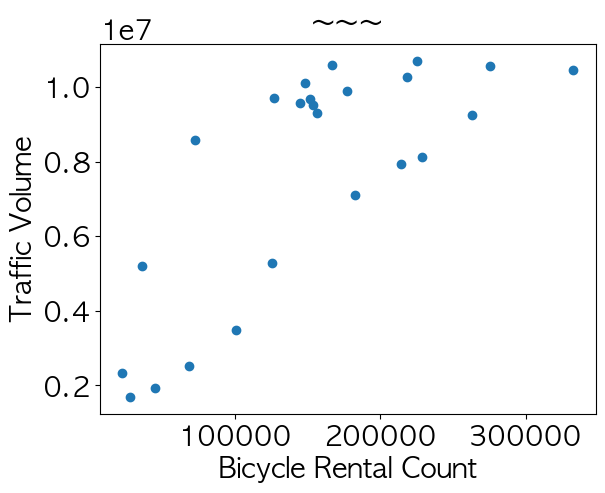

In [266]:
plt.scatter(rel['Bicycle Rental Count'], rel['traffic'])

# 축과 제목 설정
plt.xlabel('Bicycle Rental Count')
plt.ylabel('Traffic Volume')
plt.title('~~~')

# 그래프 출력
plt.show()

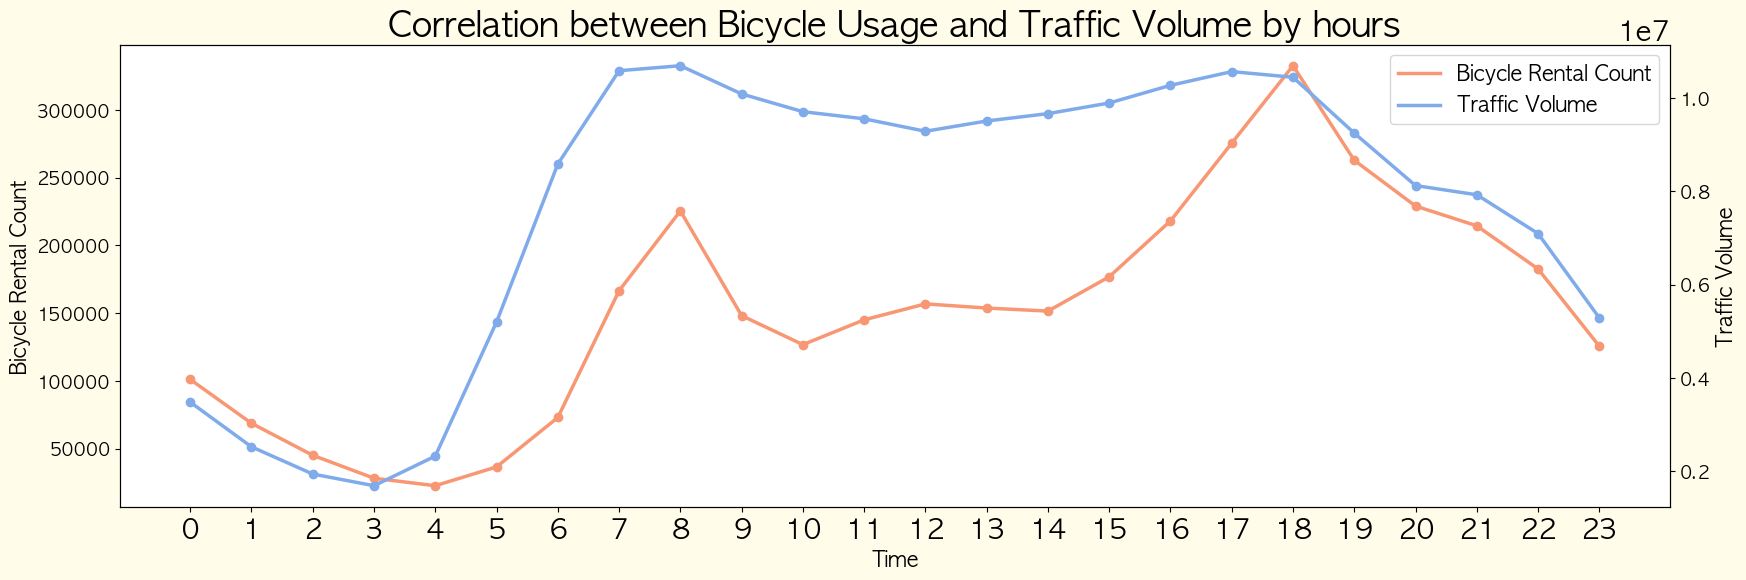

In [268]:
# graph
fig, ax1 = plt.subplots(figsize=(20, 6), facecolor='#FFFCEA')
ax2 = ax1.twinx()

line1 = ax1.plot(rel.index, rel['Bicycle Rental Count'], label='Bicycle Rental Count', color='#F89773', linewidth=2.5)
ax1.scatter(rel.index, rel['Bicycle Rental Count'], label='Bicycle Rental Count', color='#F89773')
line2 = ax2.plot(rel.index, rel['traffic'], label='Traffic Volume', color='#80ABEB', linewidth=2.5)
ax2.scatter(a.index, rel['traffic'], label='Traffic Volume', color='#80ABEB')

#     ax1.set_ylim([0, 0.06])
#     ax2.set_ylim([0.25, 0.58])

lines = line1+ line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 15, loc='upper right')
ax1.set_ylabel('Bicycle Rental Count', fontdict={'fontsize':15})
ax2.set_ylabel('Traffic Volume', fontdict={'fontsize':15})
ax1.set_xlabel('Time', fontdict={'fontsize':15})

ax1.tick_params(axis='y', labelsize=13)
ax2.tick_params(axis='y', labelsize=13)
plt.xticks(rel.index[::1], rel.index[::1], fontsize=15)
plt.yticks(fontsize=13)
plt.title('Correlation between Bicycle Usage and Traffic Volume by hours' , fontdict = {'fontsize' : 25})
#     plt.axvline(x=8, color='0.5', linestyle='--', linewidth=2)
#     plt.axvline(x=18, color='0.5', linestyle='--', linewidth=2)
#     plt.show()

print()

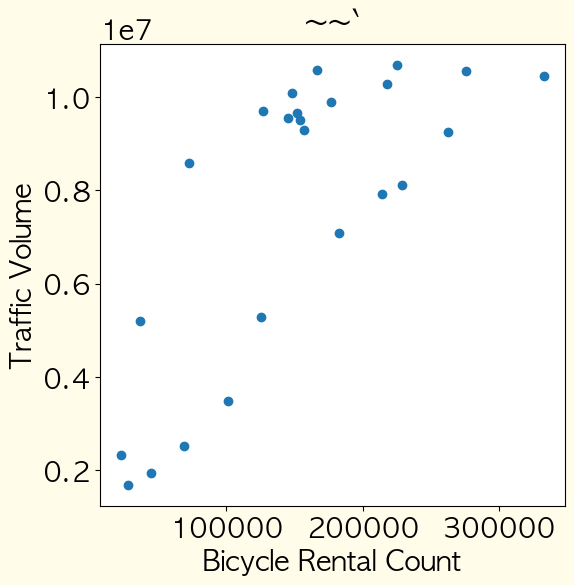

In [419]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

fig, ax1 = plt.subplots(figsize=(6, 6), facecolor='#FFFCEA')
plt.scatter(rel['Bicycle Rental Count'], rel['traffic'])

# 축과 제목 설정
plt.xlabel('Bicycle Rental Count')
plt.ylabel('Traffic Volume')
plt.title('~~`')

# 상관계수 및 p-value 계산
correlation, p_value = pearsonr(rel['Bicycle Rental Count'], rel['traffic'])

# 결과 출력
#plt.text(0.5, 0.9, f"상관계수: {correlation:.2f}\np-value: {p_value:.3f}", 
#

# 그래프 출력
plt.show()


# 대기오염물질과의

In [270]:
air = pd.read_csv('서울시 시간 평균 대기오염도 정보.csv', encoding='cp949')

In [272]:
air['측정일시'] = air['측정일시'].astype('str')
air['측정일시'] = pd.to_datetime(air['측정일시'])
air

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,2023-07-12 15:00:00,노원구,0.0168,0.0651,0.38,0.0022,24.0,22.0
1,2023-07-12 15:00:00,도봉구,0.0084,0.0701,0.31,0.0023,19.0,16.0
2,2023-07-12 15:00:00,서초구,0.0180,0.0669,0.34,0.0027,27.0,20.0
3,2023-07-12 15:00:00,관악구,0.0114,0.0748,0.32,0.0028,28.0,21.0
4,2023-07-12 15:00:00,구로구,0.0076,0.0632,0.23,0.0021,14.0,15.0
...,...,...,...,...,...,...,...,...
4220,2023-07-05 15:00:00,성동구,0.0145,0.0621,0.38,0.0025,35.0,15.0
4221,2023-07-05 15:00:00,성북구,0.0102,0.0636,0.38,0.0028,36.0,22.0
4222,2023-07-05 15:00:00,강북구,NaN,NaN,NaN,NaN,30.0,15.0
4223,2023-07-05 15:00:00,종로구,0.0130,0.0652,0.48,0.0030,37.0,19.0


In [274]:
pm = pd.read_csv('서울시 대기질 자료 제공_2022.csv', encoding='cp949')
pm

,일시,구분,미세먼지(PM10),초미세먼지(PM2.5)
0,2022-12-31 23:00,평균,59.0,46.0
1,2022-12-31 23:00,강남구,57.0,44.0
2,2022-12-31 23:00,강동구,68.0,55.0
3,2022-12-31 23:00,강북구,59.0,42.0
4,2022-12-31 23:00,강서구,62.0,40.0
...,...,...,...,...
227755,2022-01-01 0:00,용산구,22.0,11.0
227756,2022-01-01 0:00,은평구,19.0,9.0
227757,2022-01-01 0:00,종로구,20.0,9.0
227758,2022-01-01 0:00,중구,20.0,11.0


In [277]:
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227760 entries, 0 to 227759
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   일시            227760 non-null  object 
 1   구분            227760 non-null  object 
 2   미세먼지(PM10)    222844 non-null  float64
 3   초미세먼지(PM2.5)  223513 non-null  float64
dtypes: float64(2), object(2)
memory usage: 7.0+ MB


In [343]:
b = pd.read_excel('2022년 6월.xlsx')

In [355]:
air = b.copy()
air

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2022060101,0.0040,0.4,0.022,0.0390,19.0,7.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2022060102,0.0040,0.4,0.028,0.0300,23.0,10.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2022060103,0.0040,0.5,0.022,0.0320,20.0,12.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2022060104,0.0040,0.4,0.023,0.0290,20.0,10.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2022060105,0.0040,0.4,0.037,0.0170,19.0,9.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...,...
460420,인천 옹진군,국가배경농도,831495,울도,2022063020,0.0014,NaN,0.022,0.0061,17.0,1.0,인천 옹진군 덕적면 울도리 85번지
460421,인천 옹진군,국가배경농도,831495,울도,2022063021,0.0014,NaN,0.021,0.0049,21.0,3.0,인천 옹진군 덕적면 울도리 85번지
460422,인천 옹진군,국가배경농도,831495,울도,2022063022,0.0013,NaN,0.020,0.0036,16.0,3.0,인천 옹진군 덕적면 울도리 85번지
460423,인천 옹진군,국가배경농도,831495,울도,2022063023,0.0013,NaN,0.017,0.0044,13.0,2.0,인천 옹진군 덕적면 울도리 85번지


In [356]:
air = air[air['지역'].str.contains('서울')]
air

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2022060101,0.004,0.4,0.022,0.039,19.0,7.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2022060102,0.004,0.4,0.028,0.030,23.0,10.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2022060103,0.004,0.5,0.022,0.032,20.0,12.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2022060104,0.004,0.4,0.023,0.029,20.0,10.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2022060105,0.004,0.4,0.037,0.017,19.0,9.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...,...
28795,서울 노원구,도로변대기,111312,화랑로,2022063020,0.003,0.4,0.027,0.039,6.0,4.0,서울 노원구 화랑로 429
28796,서울 노원구,도로변대기,111312,화랑로,2022063021,0.003,0.4,0.023,0.039,9.0,7.0,서울 노원구 화랑로 429
28797,서울 노원구,도로변대기,111312,화랑로,2022063022,0.002,0.4,0.026,0.034,7.0,3.0,서울 노원구 화랑로 429
28798,서울 노원구,도로변대기,111312,화랑로,2022063023,0.002,0.4,0.022,0.038,7.0,4.0,서울 노원구 화랑로 429


In [357]:
air['망'].value_counts()

도시대기     18000
도로변대기    10800
Name: 망, dtype: int64

In [358]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28800 entries, 0 to 28799
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      28800 non-null  object 
 1   망       28800 non-null  object 
 2   측정소코드   28800 non-null  int64  
 3   측정소명    28800 non-null  object 
 4   측정일시    28800 non-null  int64  
 5   SO2     28455 non-null  float64
 6   CO      28596 non-null  float64
 7   O3      28601 non-null  float64
 8   NO2     28588 non-null  float64
 9   PM10    28209 non-null  float64
 10  PM25    28222 non-null  float64
 11  주소      28800 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 2.9+ MB


In [359]:
for i in range(len(air)):
    if str(air['측정일시'][i])[-2:] == '24':
        air['측정일시'][i] += 76

In [360]:
air['측정일시'] = air['측정일시'].astype('str')

In [361]:
air = air[air['측정일시']!='2022063100']

In [362]:
air.reset_index(inplace=True)
air = air.drop('index', axis=1)
air

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2022060101,0.004,0.4,0.022,0.039,19.0,7.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2022060102,0.004,0.4,0.028,0.030,23.0,10.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2022060103,0.004,0.5,0.022,0.032,20.0,12.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2022060104,0.004,0.4,0.023,0.029,20.0,10.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2022060105,0.004,0.4,0.037,0.017,19.0,9.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...,...
28755,서울 노원구,도로변대기,111312,화랑로,2022063019,0.003,0.5,0.024,0.042,8.0,4.0,서울 노원구 화랑로 429
28756,서울 노원구,도로변대기,111312,화랑로,2022063020,0.003,0.4,0.027,0.039,6.0,4.0,서울 노원구 화랑로 429
28757,서울 노원구,도로변대기,111312,화랑로,2022063021,0.003,0.4,0.023,0.039,9.0,7.0,서울 노원구 화랑로 429
28758,서울 노원구,도로변대기,111312,화랑로,2022063022,0.002,0.4,0.026,0.034,7.0,3.0,서울 노원구 화랑로 429


In [363]:
for i in range(len(air)):
    air['측정일시'][i] = datetime.strptime(air['측정일시'][i], '%Y%m%d%H')
    
air

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2022-06-01 01:00:00,0.004,0.4,0.022,0.039,19.0,7.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2022-06-01 02:00:00,0.004,0.4,0.028,0.030,23.0,10.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2022-06-01 03:00:00,0.004,0.5,0.022,0.032,20.0,12.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2022-06-01 04:00:00,0.004,0.4,0.023,0.029,20.0,10.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2022-06-01 05:00:00,0.004,0.4,0.037,0.017,19.0,9.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...,...
28755,서울 노원구,도로변대기,111312,화랑로,2022-06-30 19:00:00,0.003,0.5,0.024,0.042,8.0,4.0,서울 노원구 화랑로 429
28756,서울 노원구,도로변대기,111312,화랑로,2022-06-30 20:00:00,0.003,0.4,0.027,0.039,6.0,4.0,서울 노원구 화랑로 429
28757,서울 노원구,도로변대기,111312,화랑로,2022-06-30 21:00:00,0.003,0.4,0.023,0.039,9.0,7.0,서울 노원구 화랑로 429
28758,서울 노원구,도로변대기,111312,화랑로,2022-06-30 22:00:00,0.002,0.4,0.026,0.034,7.0,3.0,서울 노원구 화랑로 429


In [394]:
def find_the_best(x):
    x.index = x['측정일시'].dt.hour
    x = x[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']]
    z = pd.concat([rel,x], axis=1)
    print(z.corr()['traffic'])

In [392]:
district = air['측정소명'].unique()
day_list = air['측정일시'].dt.day.unique()

In [399]:
for i in range(len(district)):
    a = air[(air['측정일시'].dt.day==28) & (air['측정소명']==district[i])]
    print(district[i], 28,'일')
    find_the_best(a)

중구 28 일
Bicycle Rental Count    0.752155
traffic                 1.000000
SO2                    -0.063244
CO                      0.707363
O3                      0.361878
NO2                     0.735650
PM10                    0.620443
PM25                    0.599236
Name: traffic, dtype: float64
한강대로 28 일
Bicycle Rental Count    0.752155
traffic                 1.000000
SO2                     0.295075
CO                      0.773378
O3                      0.389132
NO2                     0.686324
PM10                    0.700482
PM25                    0.617400
Name: traffic, dtype: float64
종로구 28 일
Bicycle Rental Count    0.752155
traffic                 1.000000
SO2                     0.340630
CO                      0.495196
O3                      0.562304
NO2                     0.531667
PM10                    0.686102
PM25                    0.552789
Name: traffic, dtype: float64
청계천로 28 일
Bicycle Rental Count    0.752155
traffic                 1.000000
SO2            

In [400]:
x = air[(air['측정소명']=='금천구') & (air['측정일시'].dt.day==28)]
x.index = x['측정일시'].dt.hour
x = x[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']]
z = pd.concat([rel,x], axis=1)
z.corr()['traffic']

Bicycle Rental Count    0.752155
traffic                 1.000000
SO2                    -0.045660
CO                      0.879897
O3                      0.483606
NO2                     0.840930
PM10                    0.717046
PM25                    0.591851
Name: traffic, dtype: float64

In [411]:
x = air[(air['측정소명']=='한강대로') & (air['측정일시'].dt.day==28)]
x.index = x['측정일시'].dt.hour
x = x[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']]
z = pd.concat([rel,x], axis=1)
z.corr()['traffic']

Bicycle Rental Count    0.752155
traffic                 1.000000
SO2                     0.295075
CO                      0.773378
O3                      0.389132
NO2                     0.686324
PM10                    0.700482
PM25                    0.617400
Name: traffic, dtype: float64

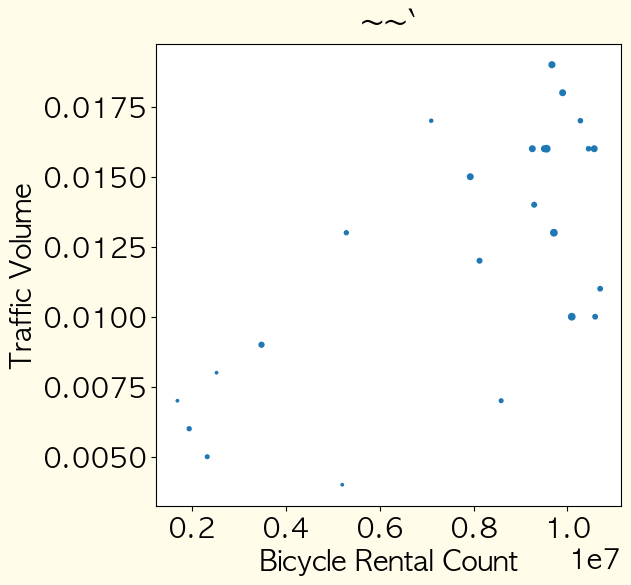

In [422]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

fig, ax1 = plt.subplots(figsize=(6, 6), facecolor='#FFFCEA')
plt.scatter(z['traffic'], z['NO2'], x['PM25'])

# 축과 제목 설정
plt.xlabel('Bicycle Rental Count')
plt.ylabel('Traffic Volume')
plt.title('~~`')

# 상관계수 및 p-value 계산
correlation, p_value = pearsonr(rel['Bicycle Rental Count'], rel['traffic'])

# 결과 출력
#plt.text(0.5, 0.9, f"상관계수: {correlation:.2f}\np-value: {p_value:.3f}", 
#

# 그래프 출력
plt.show()


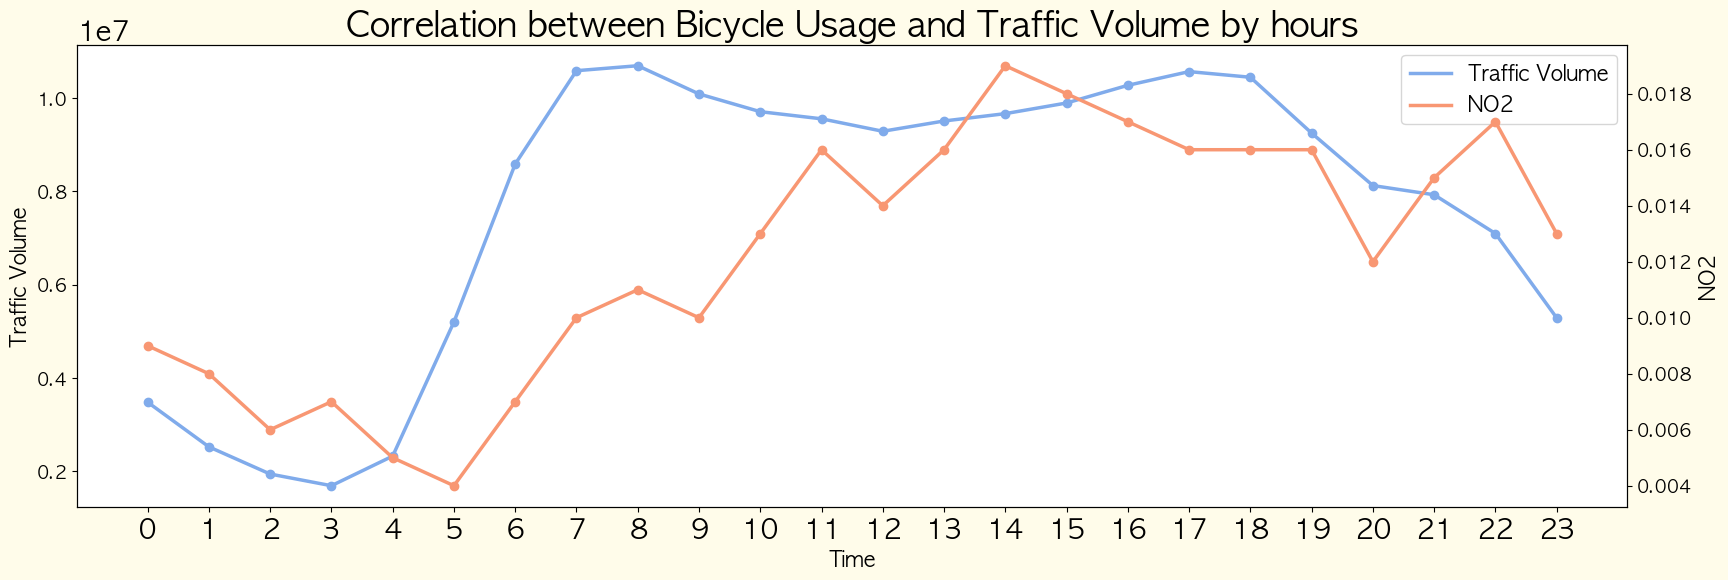

In [412]:
# graph
fig, ax1 = plt.subplots(figsize=(20, 6), facecolor='#FFFCEA')
ax2 = ax1.twinx()

line1 = ax1.plot(z.index, z['traffic'], label='Traffic Volume', color='#80ABEB', linewidth=2.5)
ax1.scatter(z.index, z['traffic'], label='Traffic Volume', color='#80ABEB')
line2 = ax2.plot(z.index, z['NO2'], label='NO2', color='#F89773', linewidth=2.5)
ax2.scatter(z.index, z['NO2'], label='NO2', color='#F89773')
# line3 = ax2.plot(z.index, z['CO'], label='CO', color='#F89773', linewidth=2.5)
# ax2.scatter(z.index, z['CO'], label='CO', color='#F89773')

#     ax1.set_ylim([0, 0.06])
#     ax2.set_ylim([0.25, 0.58])

lines = line1+ line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 15, loc='upper right')
ax1.set_ylabel('Traffic Volume', fontdict={'fontsize':15})
ax2.set_ylabel('NO2', fontdict={'fontsize':15})
ax1.set_xlabel('Time', fontdict={'fontsize':15})

ax1.tick_params(axis='y', labelsize=13)
ax2.tick_params(axis='y', labelsize=13)
plt.xticks(rel.index[::1], rel.index[::1], fontsize=15)
plt.yticks(fontsize=13)
plt.title('Correlation between Bicycle Usage and Traffic Volume by hours' , fontdict = {'fontsize' : 25})
#     plt.axvline(x=8, color='0.5', linestyle='--', linewidth=2)
#     plt.axvline(x=18, color='0.5', linestyle='--', linewidth=2)
#     plt.show()

print()

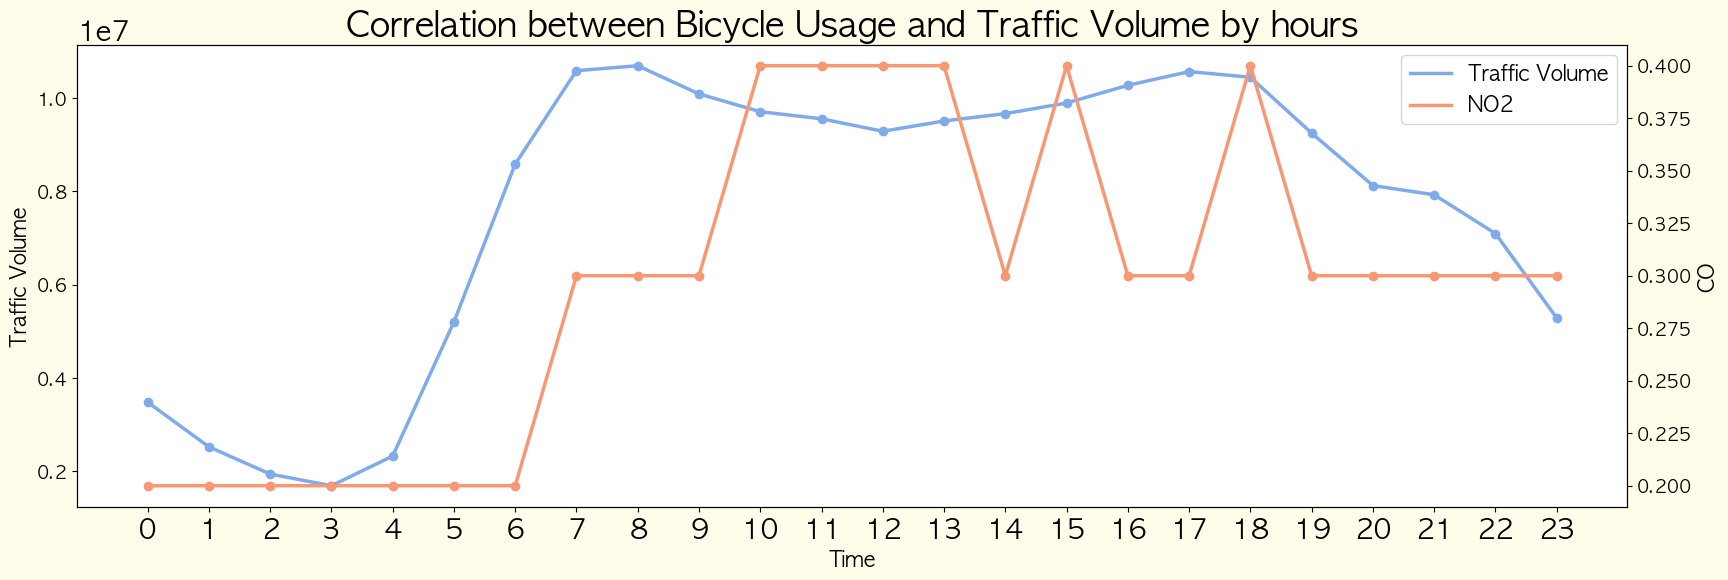

In [410]:
# graph
fig, ax1 = plt.subplots(figsize=(20, 6), facecolor='#FFFCEA')
ax2 = ax1.twinx()

line1 = ax1.plot(z.index, z['traffic'], label='Traffic Volume', color='#80ABEB', linewidth=2.5)
ax1.scatter(z.index, z['traffic'], label='Traffic Volume', color='#80ABEB')
line2 = ax2.plot(z.index, z['CO'], label='NO2', color='#F89773', linewidth=2.5)
ax2.scatter(z.index, z['CO'], label='NO2', color='#F89773')
# line3 = ax2.plot(z.index, z['CO'], label='CO', color='#F89773', linewidth=2.5)
# ax2.scatter(z.index, z['CO'], label='CO', color='#F89773')

#     ax1.set_ylim([0, 0.06])
#     ax2.set_ylim([0.25, 0.58])

lines = line1+ line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 15, loc='upper right')
ax1.set_ylabel('Traffic Volume', fontdict={'fontsize':15})
ax2.set_ylabel('CO', fontdict={'fontsize':15})
ax1.set_xlabel('Time', fontdict={'fontsize':15})

ax1.tick_params(axis='y', labelsize=13)
ax2.tick_params(axis='y', labelsize=13)
plt.xticks(rel.index[::1], rel.index[::1], fontsize=15)
plt.yticks(fontsize=13)
plt.title('Correlation between Bicycle Usage and Traffic Volume by hours' , fontdict = {'fontsize' : 25})
#     plt.axvline(x=8, color='0.5', linestyle='--', linewidth=2)
#     plt.axvline(x=18, color='0.5', linestyle='--', linewidth=2)
#     plt.show()

print()

In [282]:
a = air[air['망']=='도시대기']
b = air[air['망']=='도로변대기']

In [278]:
a.info()

경남 창원시    9360
경북 포항시    8640
충북 청주시    6480
전남 여수시    6480
경기 성남시    5760
          ... 
경남 함양군     720
충남 금산군     720
경남 함안군     720
경북 안동시     720
전남 해남군     720
Name: 지역, Length: 229, dtype: int64